In [87]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import hvplot.xarray
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import cartopy.crs as ccrs

In [2]:
def CRF(filename):
    """calculates CRF on lat/lon grid, plots global mean in a time series"""
    
    ds=xr.open_dataset(filename)
    weights=np.cos(np.deg2rad(ds.lat))
    
    ###variables
    ttrc=ds.ttrc
    tsrc=ds.tsrc
    ttr=ds.ttr
    tsr=ds.tsr
    
    ###Calculation of CRF still wrong
    CRF_LW=ttrc-ttr
    CRF_SW=tsrc-tsr
    CRF=CRF_SW+CRF_LW
    CRF_weighted=CRF.weighted(weights)
    CRF_global_mean=CRF_weighted.mean(('lat', 'lon'))/10800
    
    ###plotting
    plt.figure(figsize=(15,5))
    CRF_global_mean.plot()
    plt.ylabel('CRF [$W/m^2$]')
    plt.xlabel('Time')
    plt.savefig(filename[:-3]+'_CRF.png')

In [18]:
def output_variable(filename, var):
    """input: netcdf data, variable; plots global mean in a time series"""
    ds=xr.open_dataset(filename)
    
    variable=ds[var]
    weights=np.cos(np.deg2rad(ds.lat))
    var_weighted=variable.weighted(weights)
    
    var_global_mean=var_weighted.mean(('lat', 'lon'))
    
    ###plotting
    plt.figure(figsize=(15,5))
    var_global_mean.plot()
    plt.ylabel(var+' ['+variable.attrs['units']+']')
    plt.xlabel('Time')
    plt.savefig(filename[:-3]+'_'+var+'.png')

In [35]:
variable_list=['es','tclw','tciw','sp','tcwv','lsp','cp','sf','sshf','slhf','msl','2t','2d','ssrd','strd','ssr','str','tsr','ttr','e','tsrc','ttrc','ssrc','strc','tisr','tp','skt']

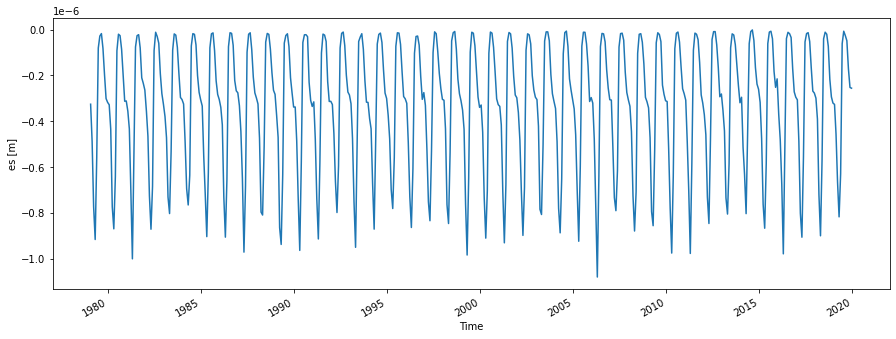

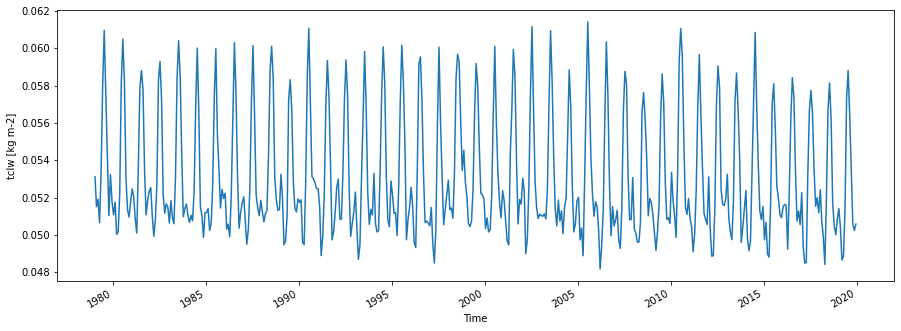

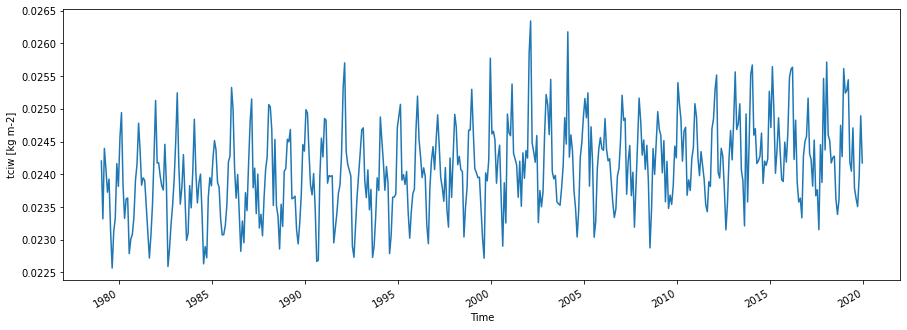

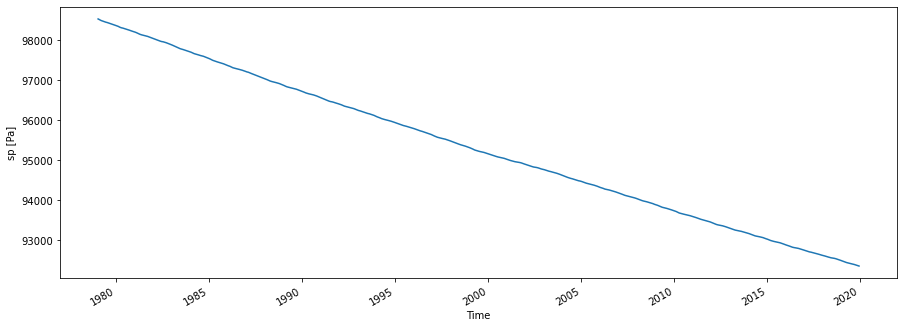

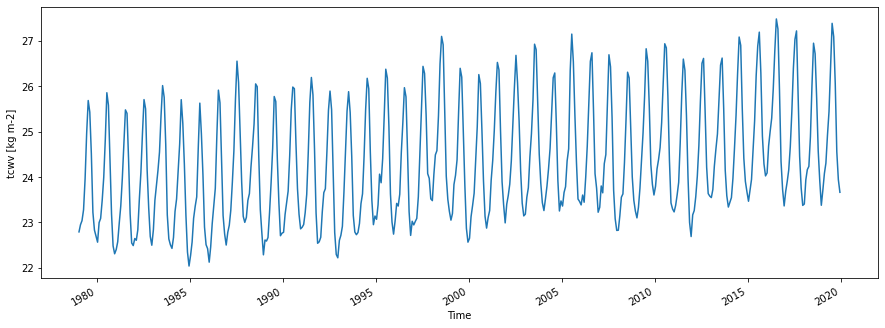

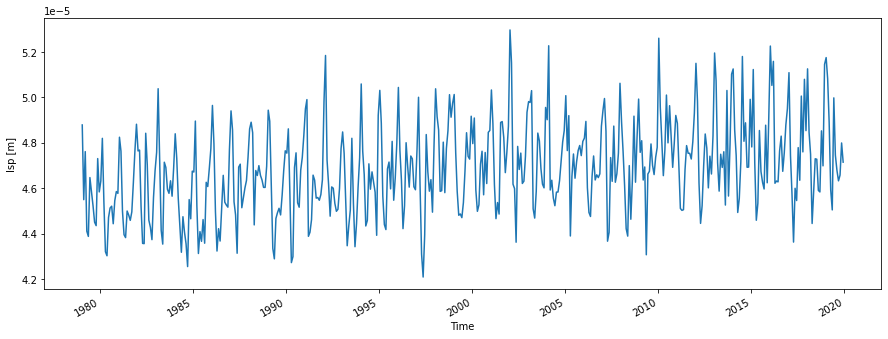

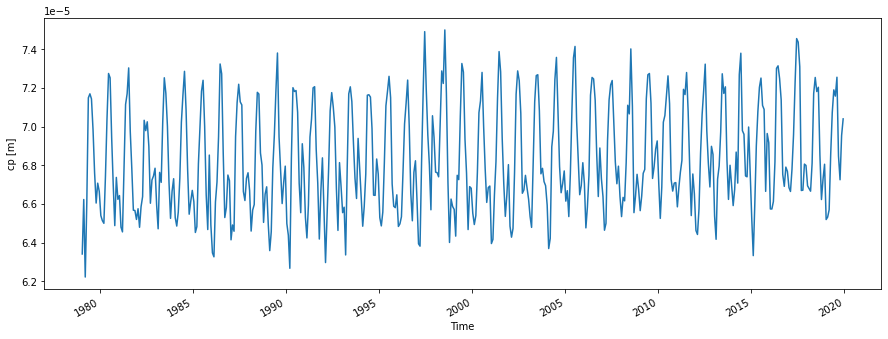

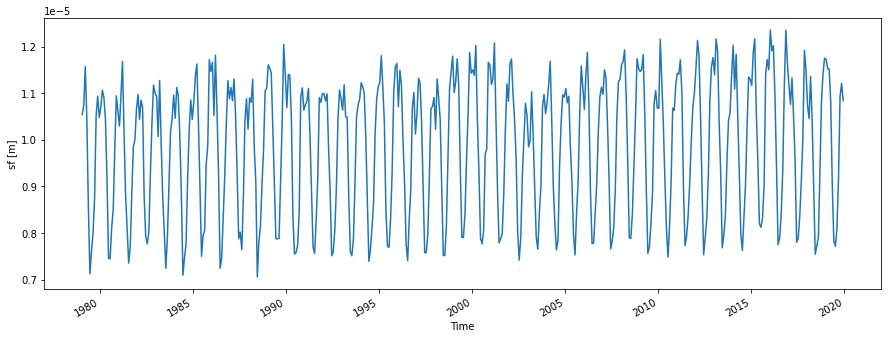

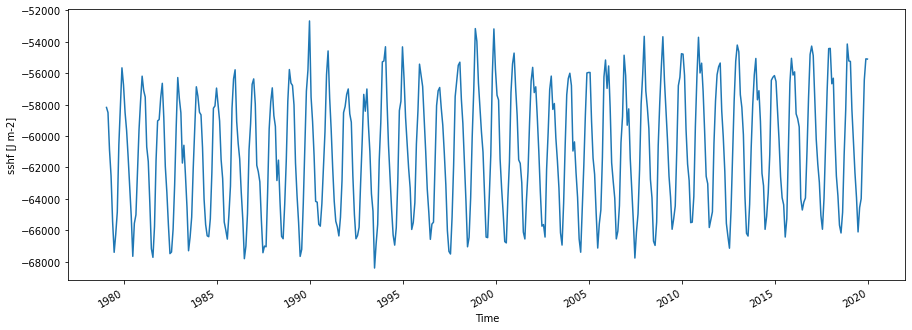

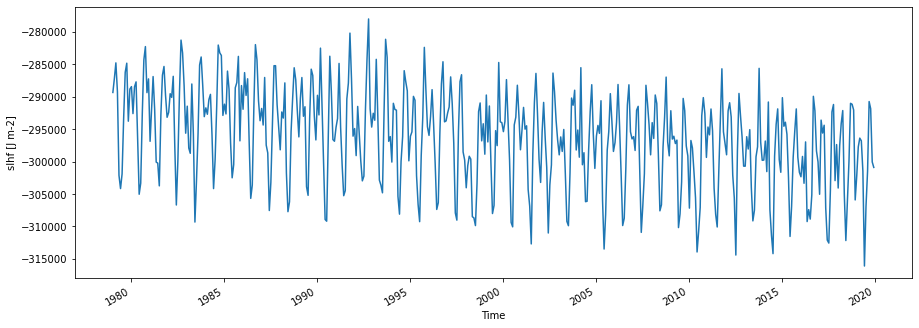

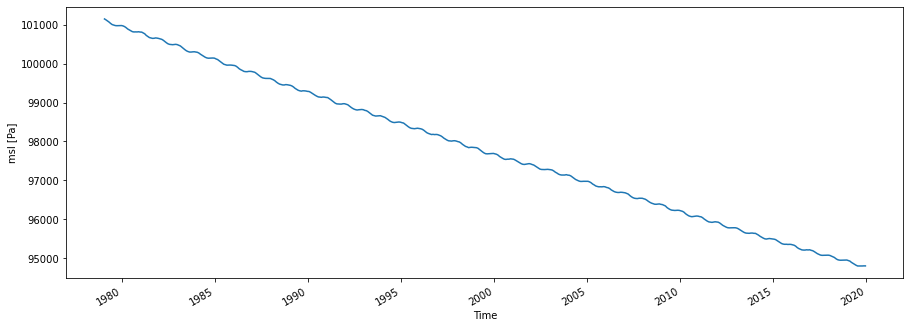

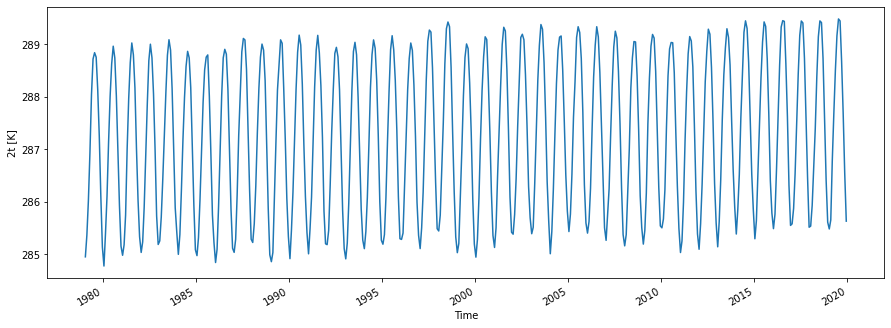

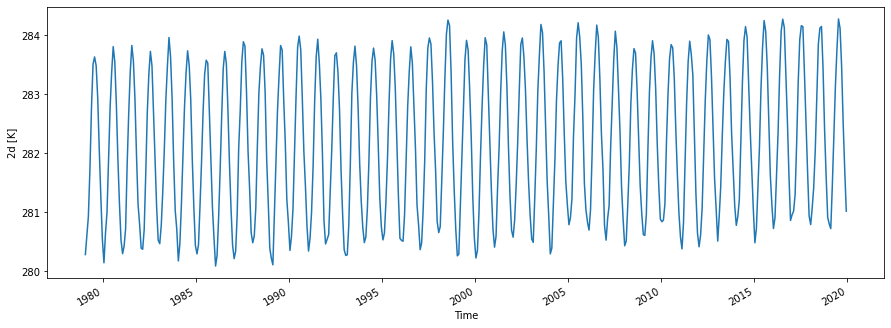

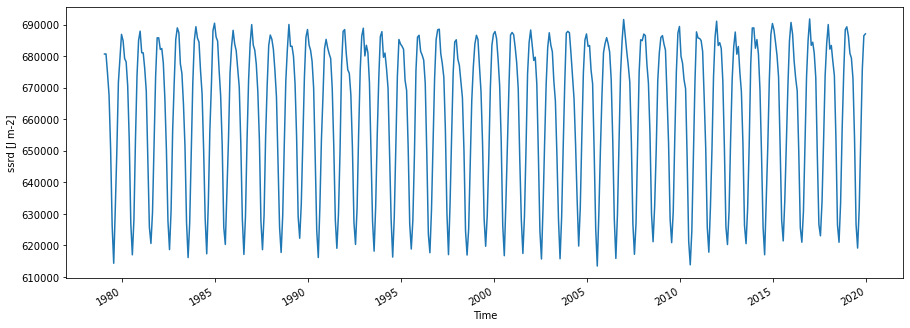

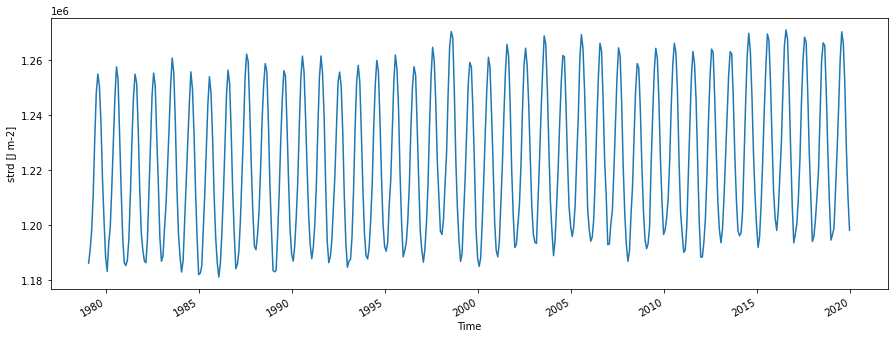

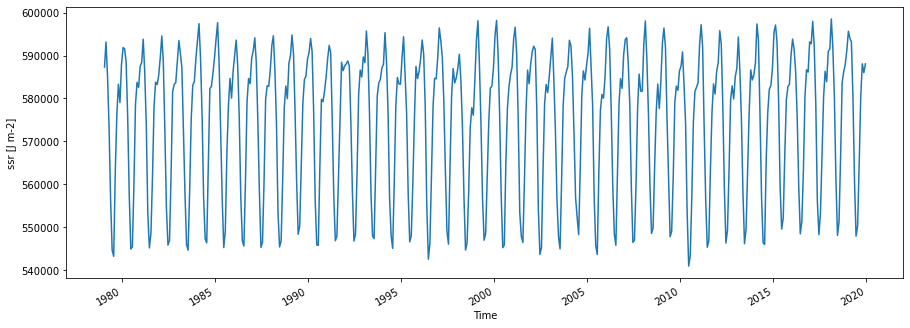

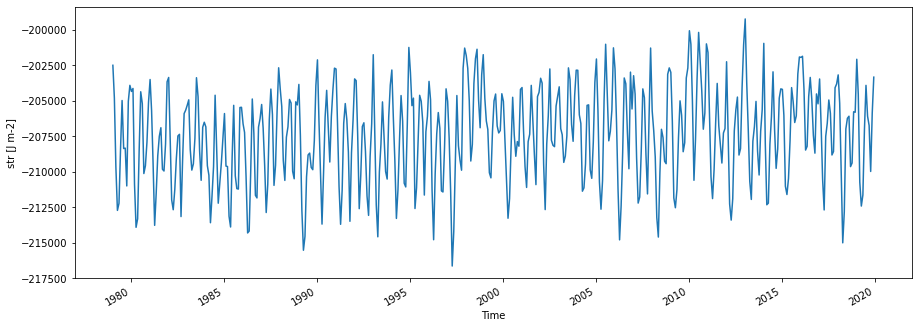

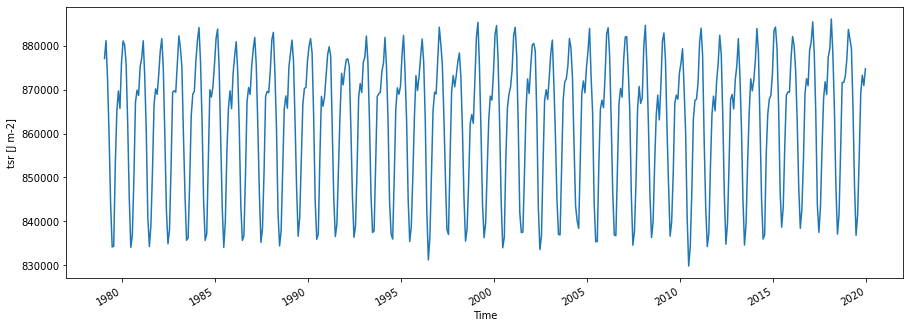

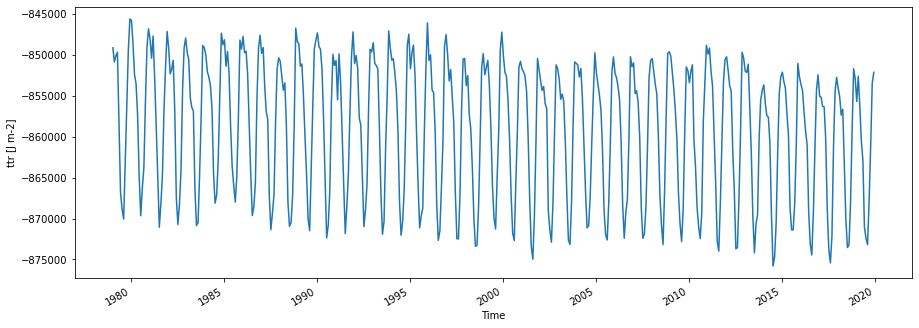

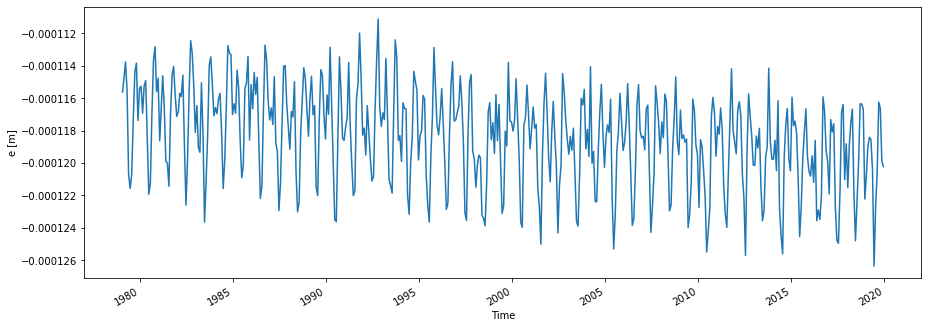

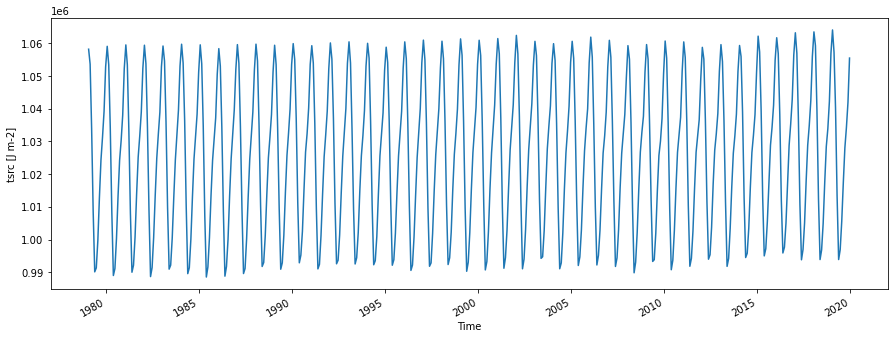

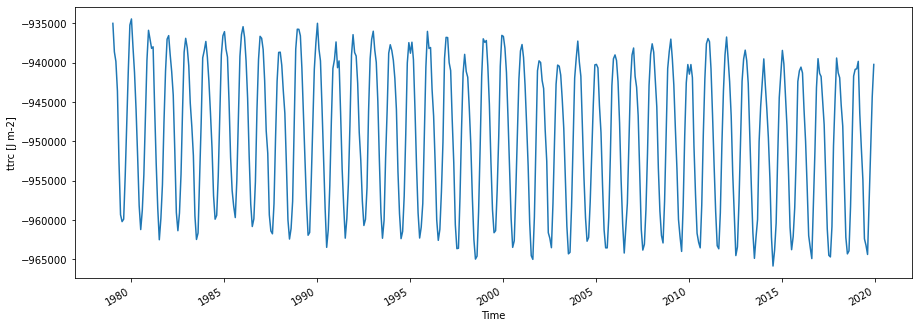

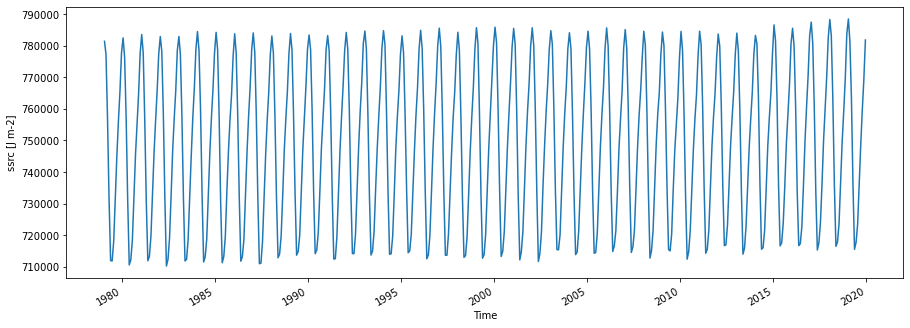

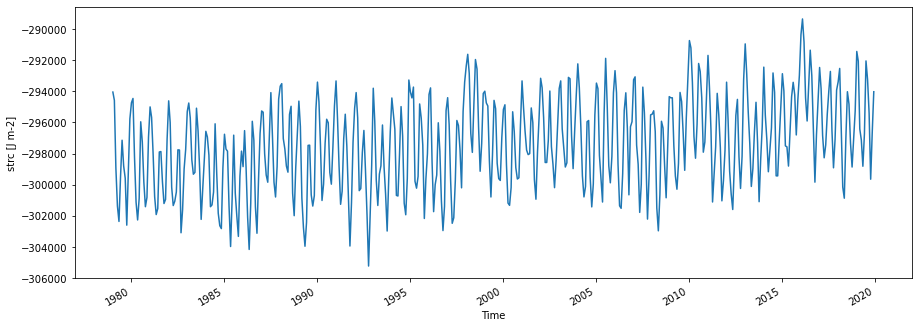

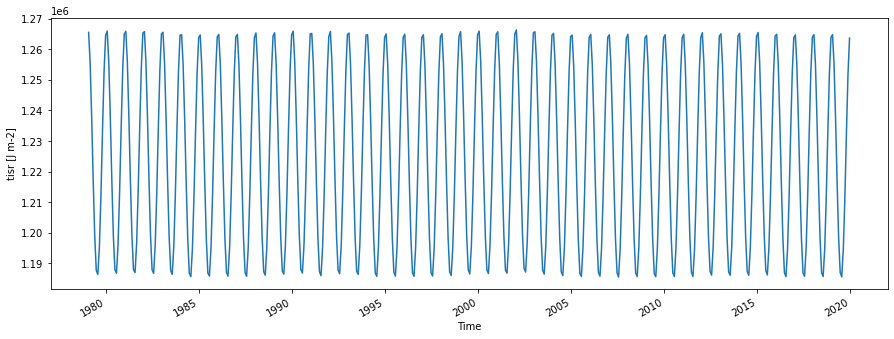

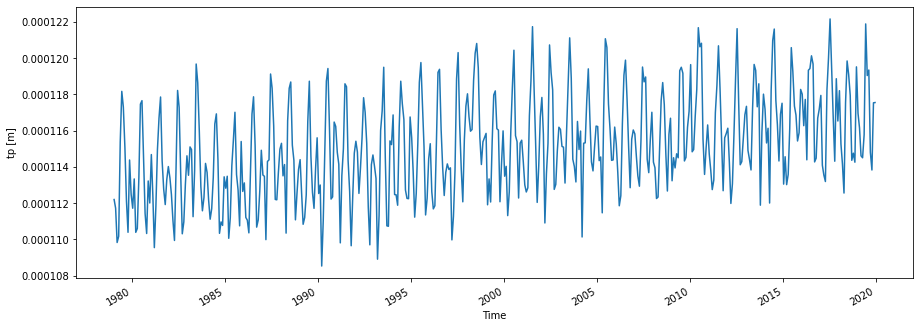

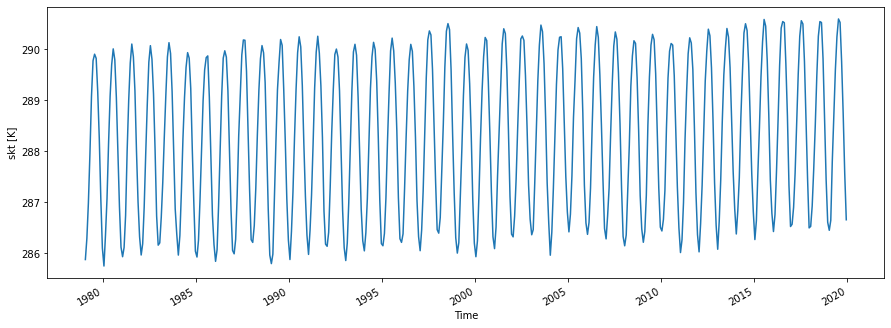

In [29]:
for i in variable_list:
    output_variable('ECE3_1m_19790101-20191231_regular_sfc.nc', i)

In [176]:
def output_variable_seasonal_map(filename, var, seas):
    """input: netcdf data, variable, season; plots seasonal average of variable as Mollweide projection"""
    ds=xr.open_dataset(filename)
    
    month_length=ds[var].time_counter.dt.days_in_month
    weights = month_length.groupby('time_counter.season') / month_length.groupby('time_counter.season').sum()
    np.testing.assert_allclose(weights.groupby('time_counter.season').sum().values, np.ones(4))
    ds_weighted = (ds[var] * weights).groupby('time_counter.season').sum(dim='time_counter')
    
    var_season=ds_weighted.sel(season=seas)
    
    ###plotting
    plt.figure(figsize=(10,5))
    p = var_season.plot(cmap='Spectral',
        subplot_kws=dict(projection=ccrs.Mollweide(0), facecolor="gray"),
        transform=ccrs.PlateCarree(),
    )
    plt.title(var+' ['+ds[var].attrs['units']+']\nseason='+seas)
    p.axes.gridlines()
    p.axes.coastlines()


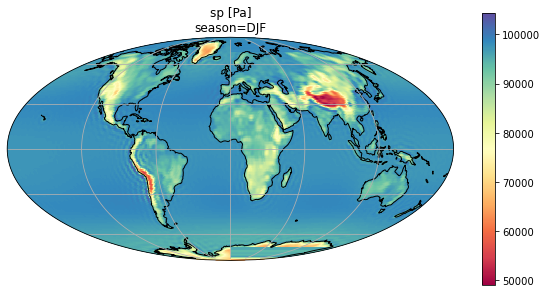

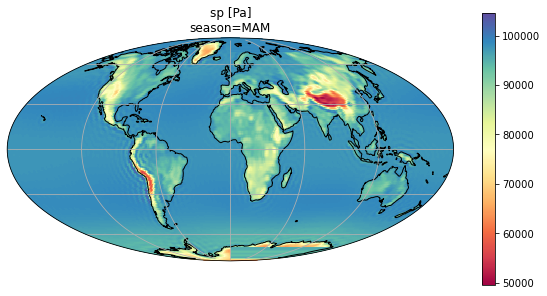

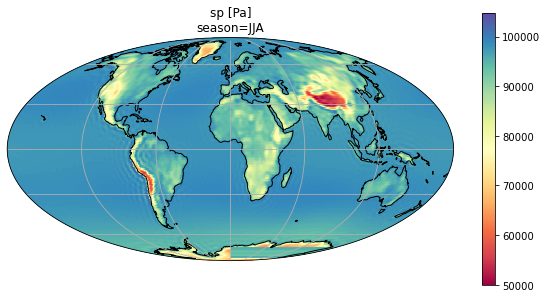

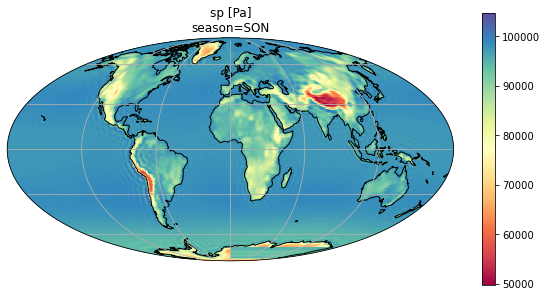

In [181]:
for i in ('DJF', 'MAM', 'JJA', 'SON'):
    output_variable_seasonal_map('ECE3_1m_19790101-20191231_regular_sfc.nc', 'sp', i)

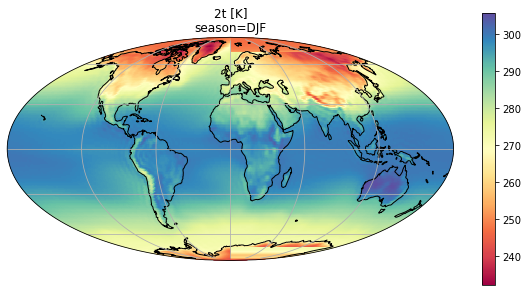

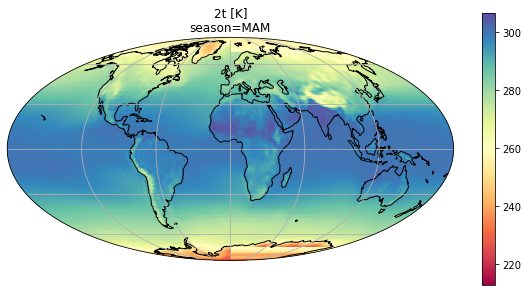

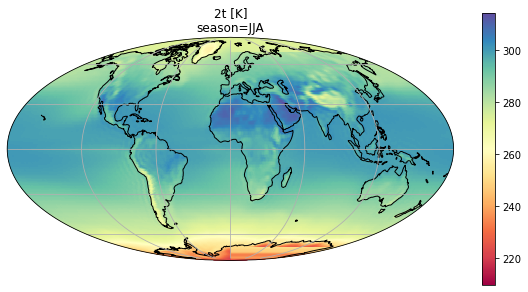

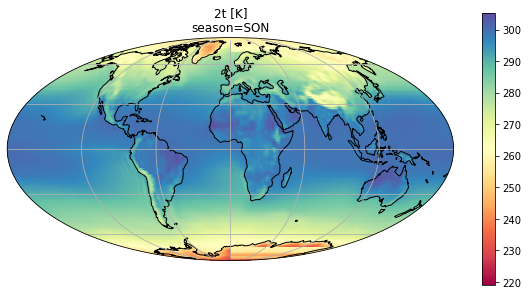

In [182]:
for i in ('DJF', 'MAM', 'JJA', 'SON'):
    output_variable_seasonal_map('ECE3_1m_19790101-20191231_regular_sfc.nc', '2t', i)